## Test Model 2030

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs

#pd.set_option("display.max_rows", None)  # Display all rows
#pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [2]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\20240313-IT\\elec_s_7_ec_lv1.5_Co2L0.4-3h.nc")


INFO:pypsa.io:Imported network elec_s_7_ec_lv1.5_Co2L0.4-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [3]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 21 entries
Component 'Carrier' has 25 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 6 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 29 entries
Component 'Load' has 7 entries
Component 'Generator' has 109 entries
Component 'StorageUnit' has 13 entries
Component 'Store' has 14 entries


In [9]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.0000,#70af1d,AC,inf,0.0
DC,0.0000,#8a1caf,DC,inf,0.0
coal,0.3361,#545454,coal,inf,0.0
biomass,0.0000,#baa741,biomass,inf,0.0
offwind-dc,0.0000,#74c6f2,Offshore Wind (DC),inf,0.0
onwind,0.0000,#235ebc,Onshore Wind,inf,0.0
solar,0.0000,#f9d002,Solar,inf,0.0
nuclear,0.0000,#ff8c00,nuclear,inf,0.0
lignite,0.4069,#826837,lignite,inf,0.0


In [5]:
n.lines.s_nom_opt

Line
0     8490.513622
1     3396.206101
2     8982.069230
3    12646.395859
4    16042.601551
5     3396.205277
Name: s_nom_opt, dtype: float64

In [6]:
n.generators.head

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,weight,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
IT0 0 CCGT,CCGT,IT0 0,0.000000,0.000000e+00,False,0.580000,46.812950,104788.020783,inf,20.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 OCGT,OCGT,IT0 0,5657.000000,5.657000e+03,True,0.379841,74.314904,47718.670564,inf,28.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 biomass,biomass,IT0 0,150.000000,1.500000e+02,False,0.468000,15.837706,294201.051170,inf,21.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 coal,coal,IT0 0,2415.474826,2.415475e+03,False,0.330000,32.223287,337208.027448,inf,22.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 0 geothermal,geothermal,IT0 0,0.000000,0.000000e+00,False,1.000000,0.010971,0.000000,inf,20.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT0 2 battery load,load,IT0 2 battery,0.000000,1.000000e+09,False,1.000000,1.009097,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 3 battery load,load,IT0 3 battery,0.000000,1.000000e+09,False,1.000000,1.010417,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
IT0 4 battery load,load,IT0 4 battery,0.000000,1.000000e+09,False,1.000000,1.010678,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [10]:
# set marginal_cost load shedding

# Assuming n.generators.carrier and n.generators.marginal_cost are lists
for i in range(len(n.generators.carrier)):
    if n.generators.carrier[i] == 'load':
        n.generators.marginal_cost[i] = 1500

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\3780980008.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if n.generators.carrier[i] == 'load':
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\3780980008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.generators.marginal_cost[i] = 1500
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\3780980008.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  n.generators.ma

In [11]:
#resolve model
n.lopf(solver_name='gurobi')

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\403696289.py:2: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  n.lopf(solver_name='gurobi')
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 8.04s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-09
Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\pypsa-problem-r4wsm6qd.lp
Reading time = 5.08 seconds
obj: 1293562 rows, 636642 columns, 2432177 nonzeros
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1293562 rows, 636642 columns and 2432177 nonzeros
Model fingerprint: 0xf6aadb2b
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [3e-02, 2e+05]
  Bounds range     [1e+00, 3e+09]
  RHS range        [2e+00, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 978467 rows and 193177 columns
Presolve time: 1.93s
Presolved: 315095 rows, 443465 columns, 1161261 no

INFO:pypsa.linopf:Optimization successful. Objective value: 1.16e+10


('ok', 'optimal')

In [12]:
stat_base = n.statistics()
stat_base

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas        0.000000e+00        0.000000e+00   
            Load shedding             2.100000e+10        2.100000e+10   
            Offshore Wind (AC)        0.000000e+00        0.000000e+00   
            Offshore Wind (DC)        0.000000e+00        0.000000e+00   
            Onshore Wind              0.000000e+00        0.000000e+00   
            Open-Cycle Gas            3.942020e+04        3.942020e+04   
            Run of River              7.871540e+03        7.871540e+03   
            Solar                     9.052460e+04        0.000000e+00   
            biomass                   5.080000e+02        5.080000e+02   
            coal                      7.275926e+03        7.275926e+03   
            geothermal                5.900000e+01        5.900000e+01   
            lignite                   0.000000e+00        0.000000e+00   
            nuclear                   0.000000e+00        0.000000e+00   
            oil                       1.500000e+02        1.500000e+02   
Line        AC                        5.295399e+04        5.295399e+04   
Link        DC                        1.000000e+03        1.000000e+03   
            H2 electrolysis           0.000000e+00        0.000000e+00   
            H2 fuel cell              0.000000e+00        0.000000e+00   
            battery charger           0.000000e+00        0.000000e+00   
            battery discharger        0.000000e+00        0.000000e+00   
Load        -                         0.000000e+00        0.000000e+00   
StorageUnit Pumped Hydro Storage      7.571900e+03        7.571900e+03   
            Reservoir & Dam           4.194800e+03        4.194800e+03   
Store       Battery Storage           0.000000e+00        0.000000e+00   
            Hydrogen Storage          0.000000e+00        0.000000e+00   

                                  Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas                NaN  0.000000e+00  0.000000e+00   
            Load shedding                0.000000  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)                NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (DC)                NaN  0.000000e+00  0.000000e+00   
            Onshore Wind                      NaN  0.000000e+00  0.000000e+00   
            Open-Cycle Gas               0.289549  9.998726e+07  0.000000e+00   
            Run of River                 0.478771  3.301350e+07  0.000000e+00   
            Solar                        0.139545  1.106589e+08  0.000000e+00   
            biomass                      0.888887  3.955619e+06  0.000000e+00   
            coal                         0.856991  5.462213e+07  0.000000e+00   
            geothermal                   1.000000  5.168400e+05  0.000000e+00   
            lignite                           NaN  0.000000e+00  0.000000e+00   
            nuclear                           NaN  0.000000e+00  0.000000e+00   
            oil                          0.000000  0.000000e+00  0.000000e+00   
Line        AC                           0.275653  0.000000e+00 -9.114061e+06   
Link        DC                           0.544156  0.000000e+00 -4.395464e+06   
            H2 electrolysis                   NaN  0.000000e+00  0.000000e+00   
            H2 fuel cell                      NaN  0.000000e+00  0.000000e+00   
            battery charger                   NaN  0.000000e+00  0.000000e+00   
            battery discharger                NaN  0.000000e+00  0.000000e+00   
Load        -                                 NaN -3.160267e+08  0.000000e+00   
StorageUnit Pumped Hydro Storage         0.324440 -3.074295e+06  0.000000e+00   
            Reservoir & Dam              0.444855  1.634683e+07  0.000000e+00   
Store       Battery Storage                   NaN  0.000000e+00  0.000000e+00   
            Hydrogen Storage                  NaN  0.000000e+00  0.000000e+00   

  

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


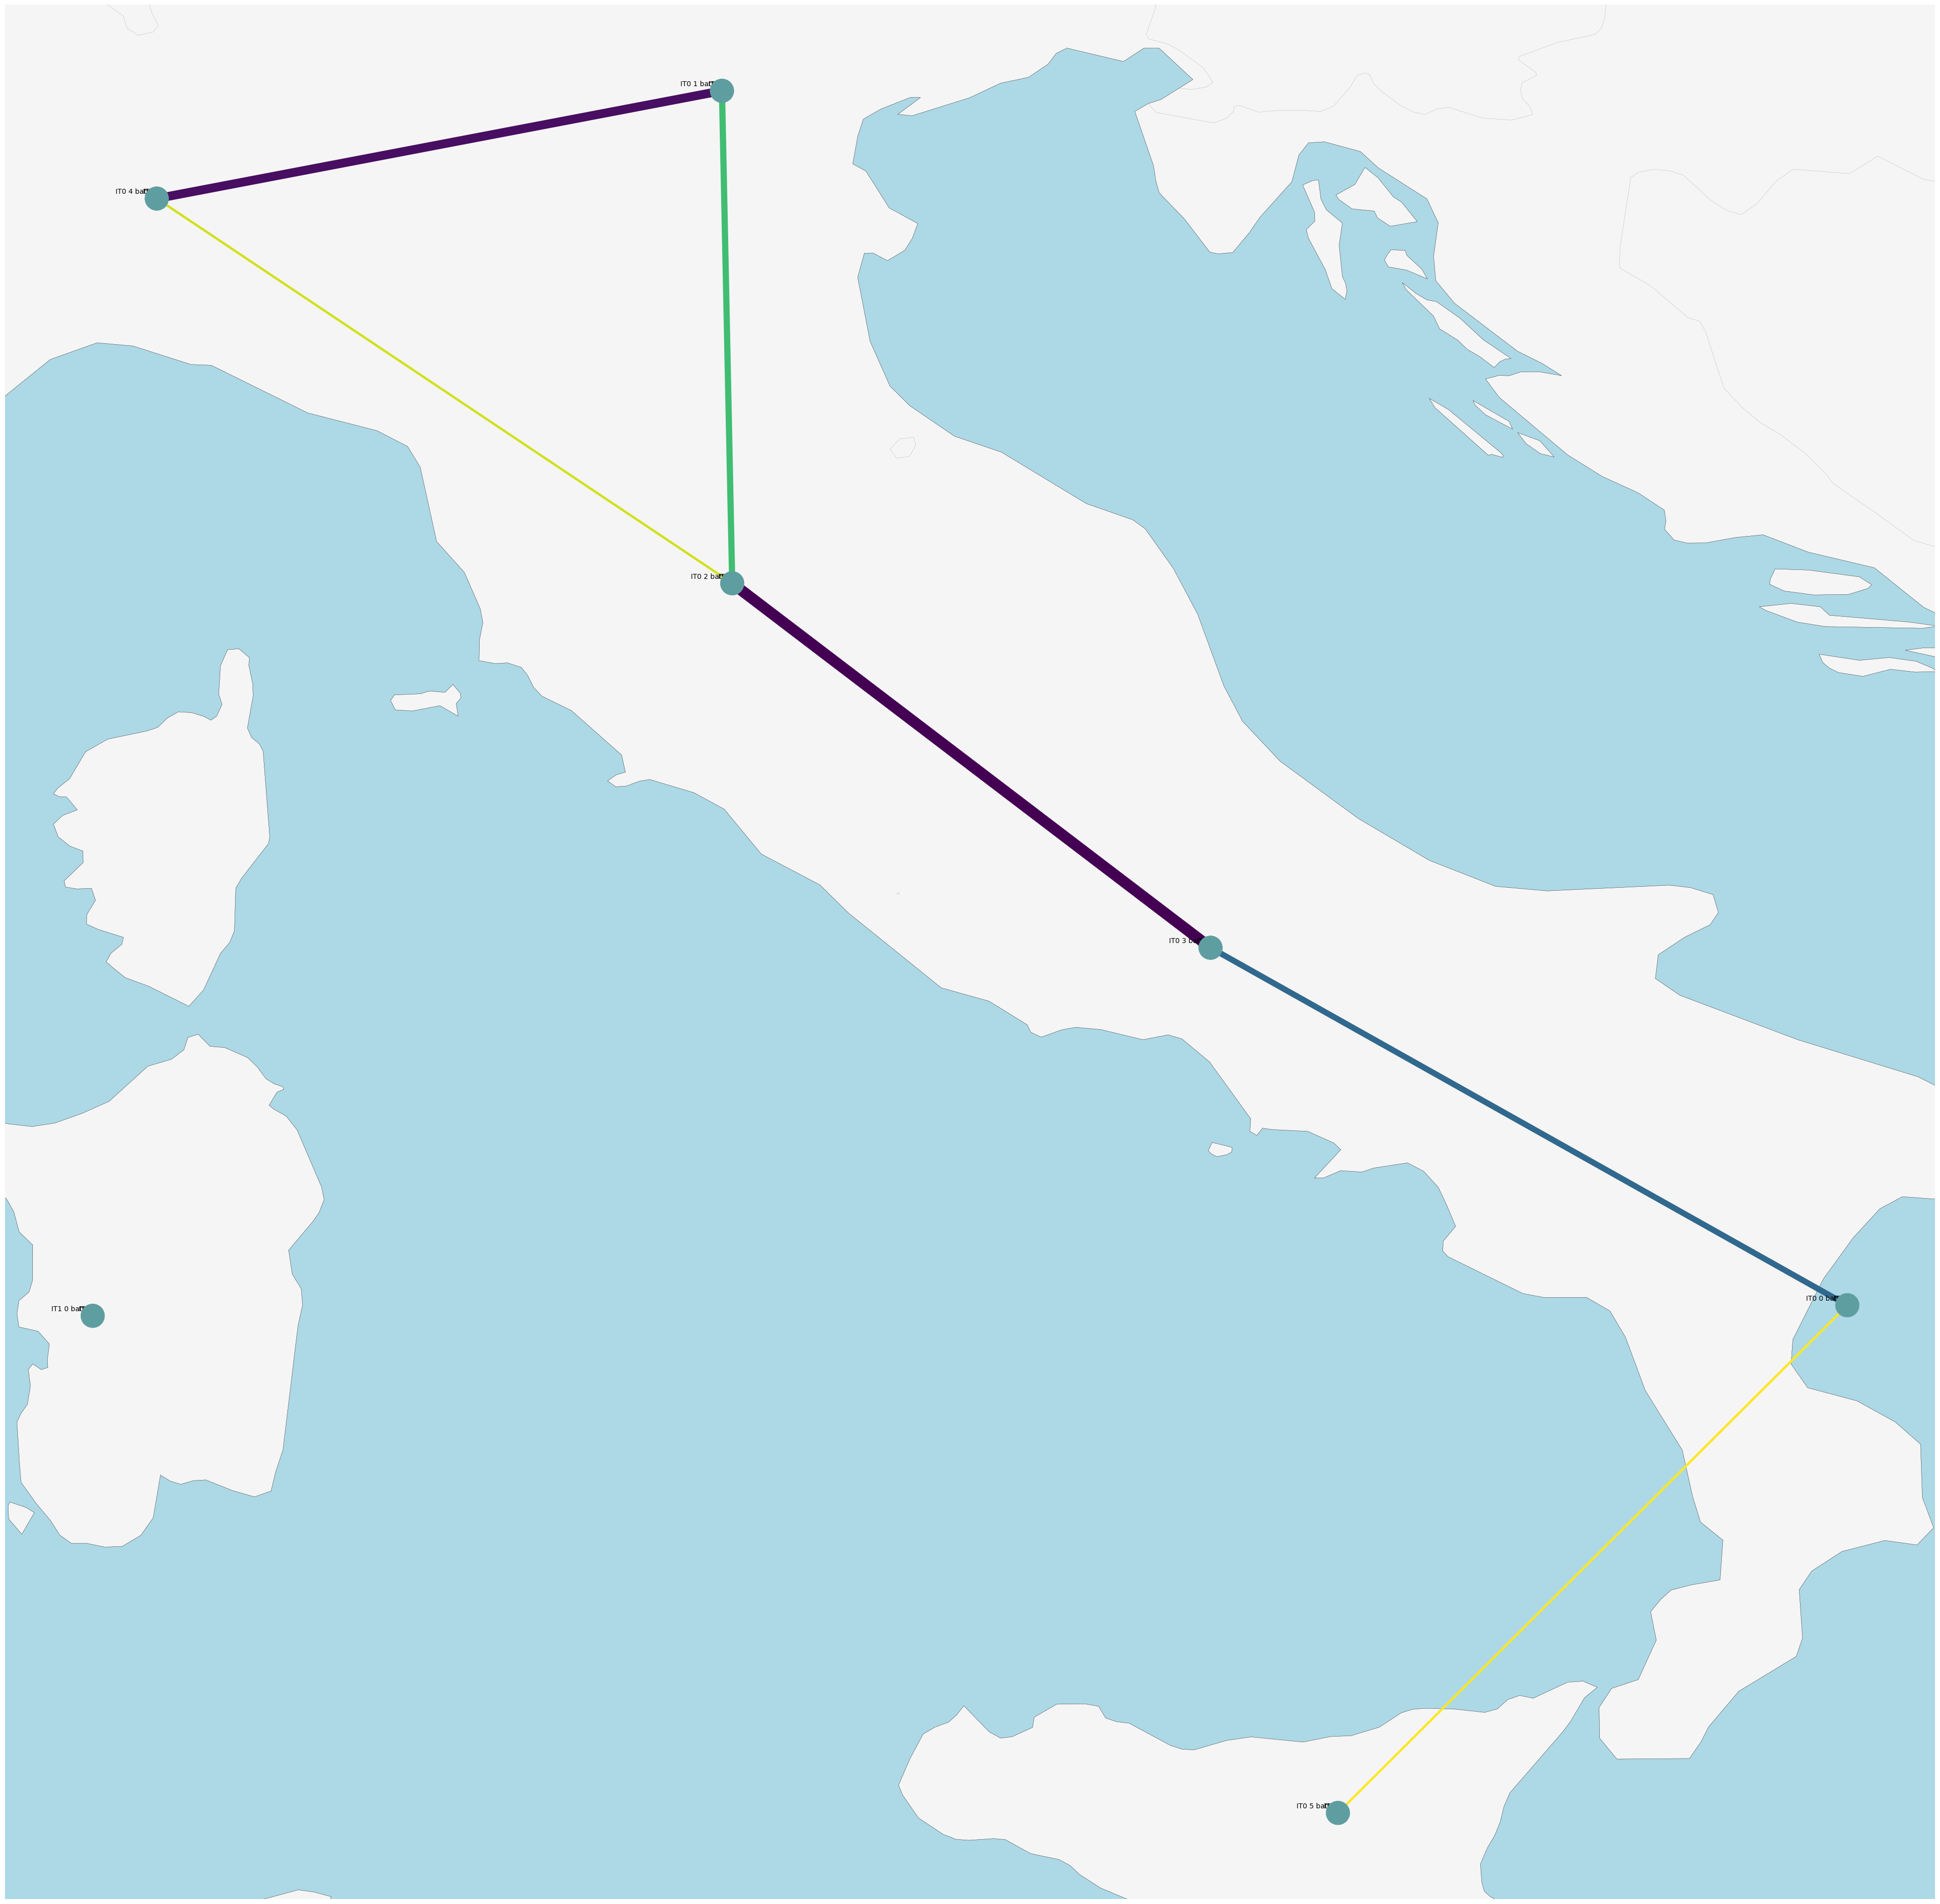

In [13]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(50,50),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show





## Installed Capcity

In [73]:
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
colors = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            colors.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\1111596835.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors.append(n.carriers.color[j])


In [89]:
def inst_cap_table(colors,gen):

    

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

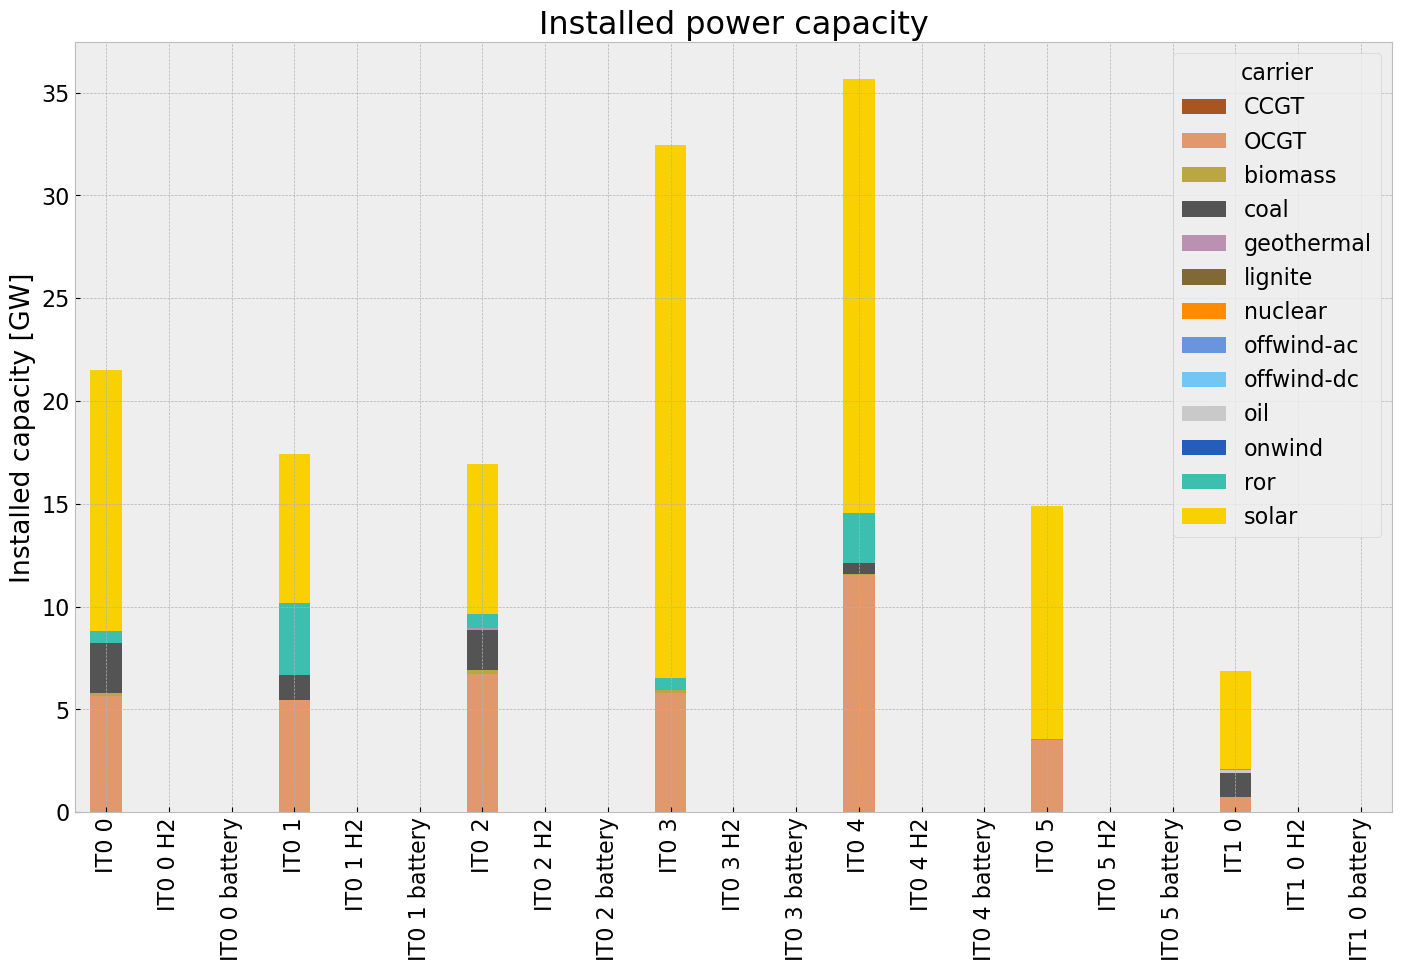

In [90]:
# consolidated istalled cap without load_shedding
capacities = gen.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities.fillna(0, inplace=True)
gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)


inst_cap_table(colors,gen)

## Generation

In [86]:
def gen_power_table(gen_t, colors):

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen_t.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

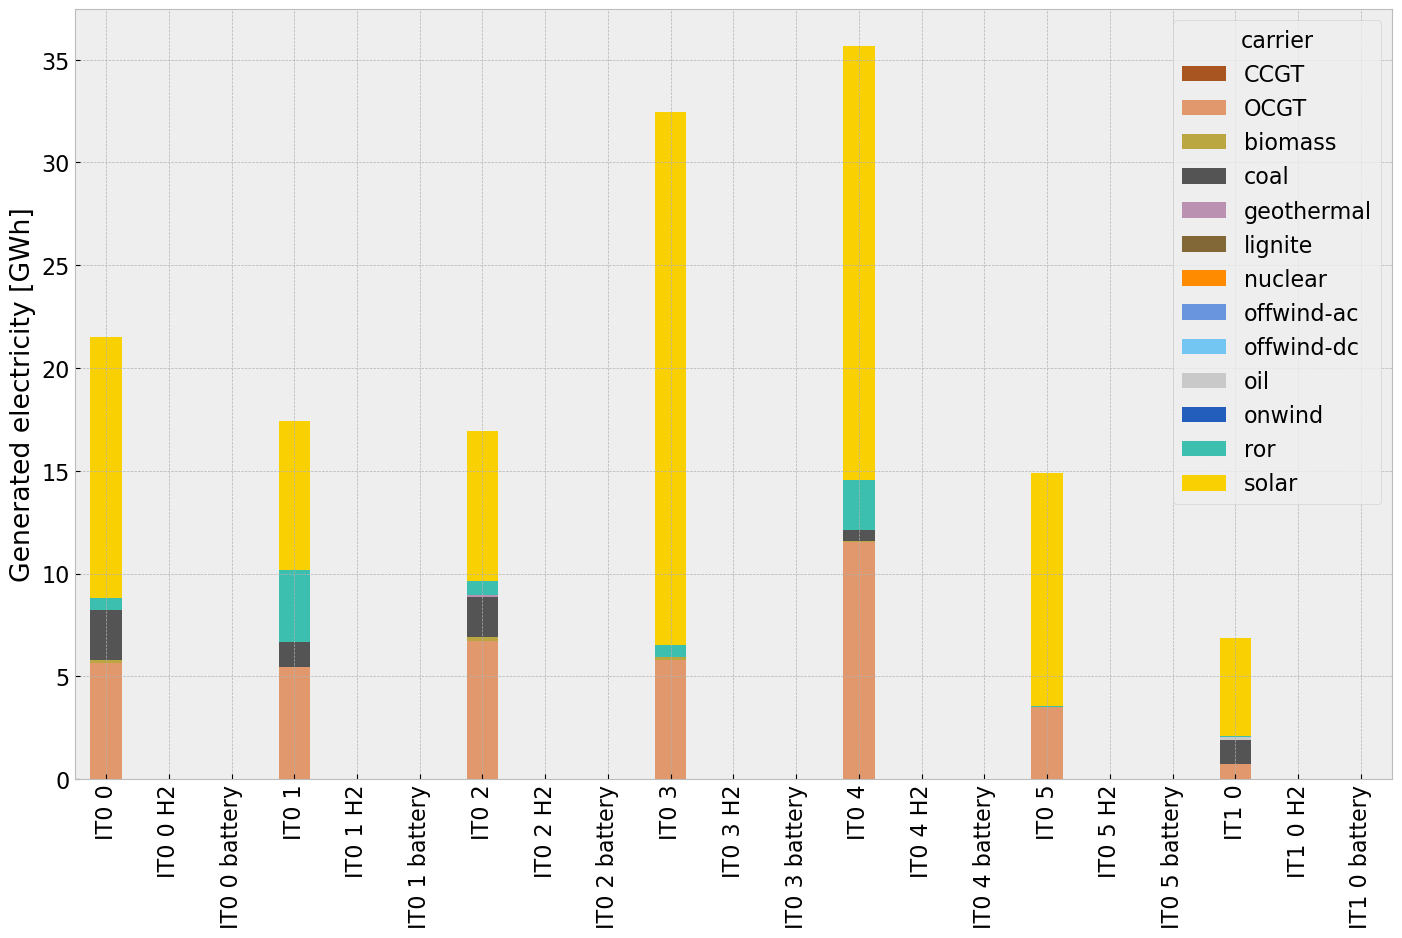

In [88]:
# consolidated generation table without load shedding
df_tot_generation = n.generators_t.p.sum()

generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

gen_t =(capacities.unstack()/1000).drop(columns=['load'],inplace=False)

gen_power_table(gen_t,colors)

## Snapshot

In [101]:
def gen_curve_month_summer(colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-03"

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(20, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-15,60)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\1875889892.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\1875889892.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


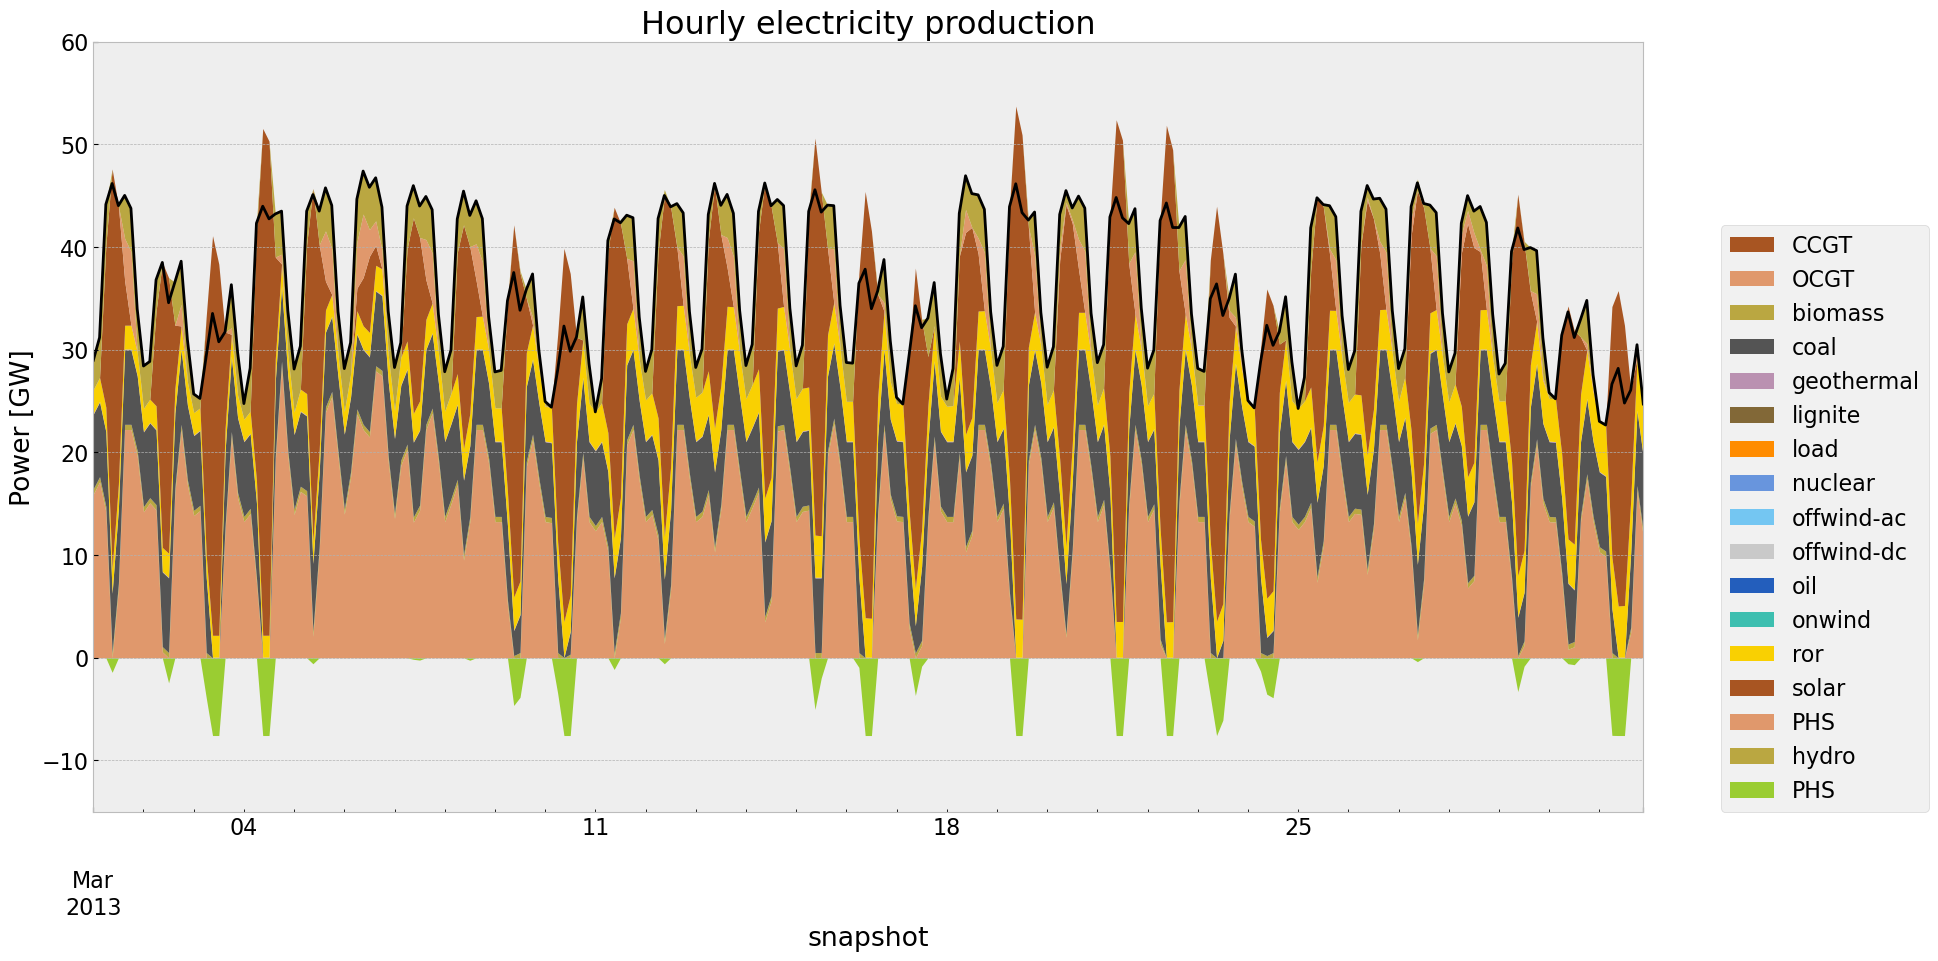

In [102]:

gen_curve_month_summer(colors)

In [128]:
def gen_curve_month_winter(colors):

    plt.rcParams.update({'font.size': 16})

    time="2013-01"

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(25, 10))
        
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta"],
            grid=True,
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k',grid=True)

    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    #ax.set_title(f"Hourly electricity production in Italy in a winter month in {year}")


    ax.set_ylim(-20, 60)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\1080171967.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\1080171967.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


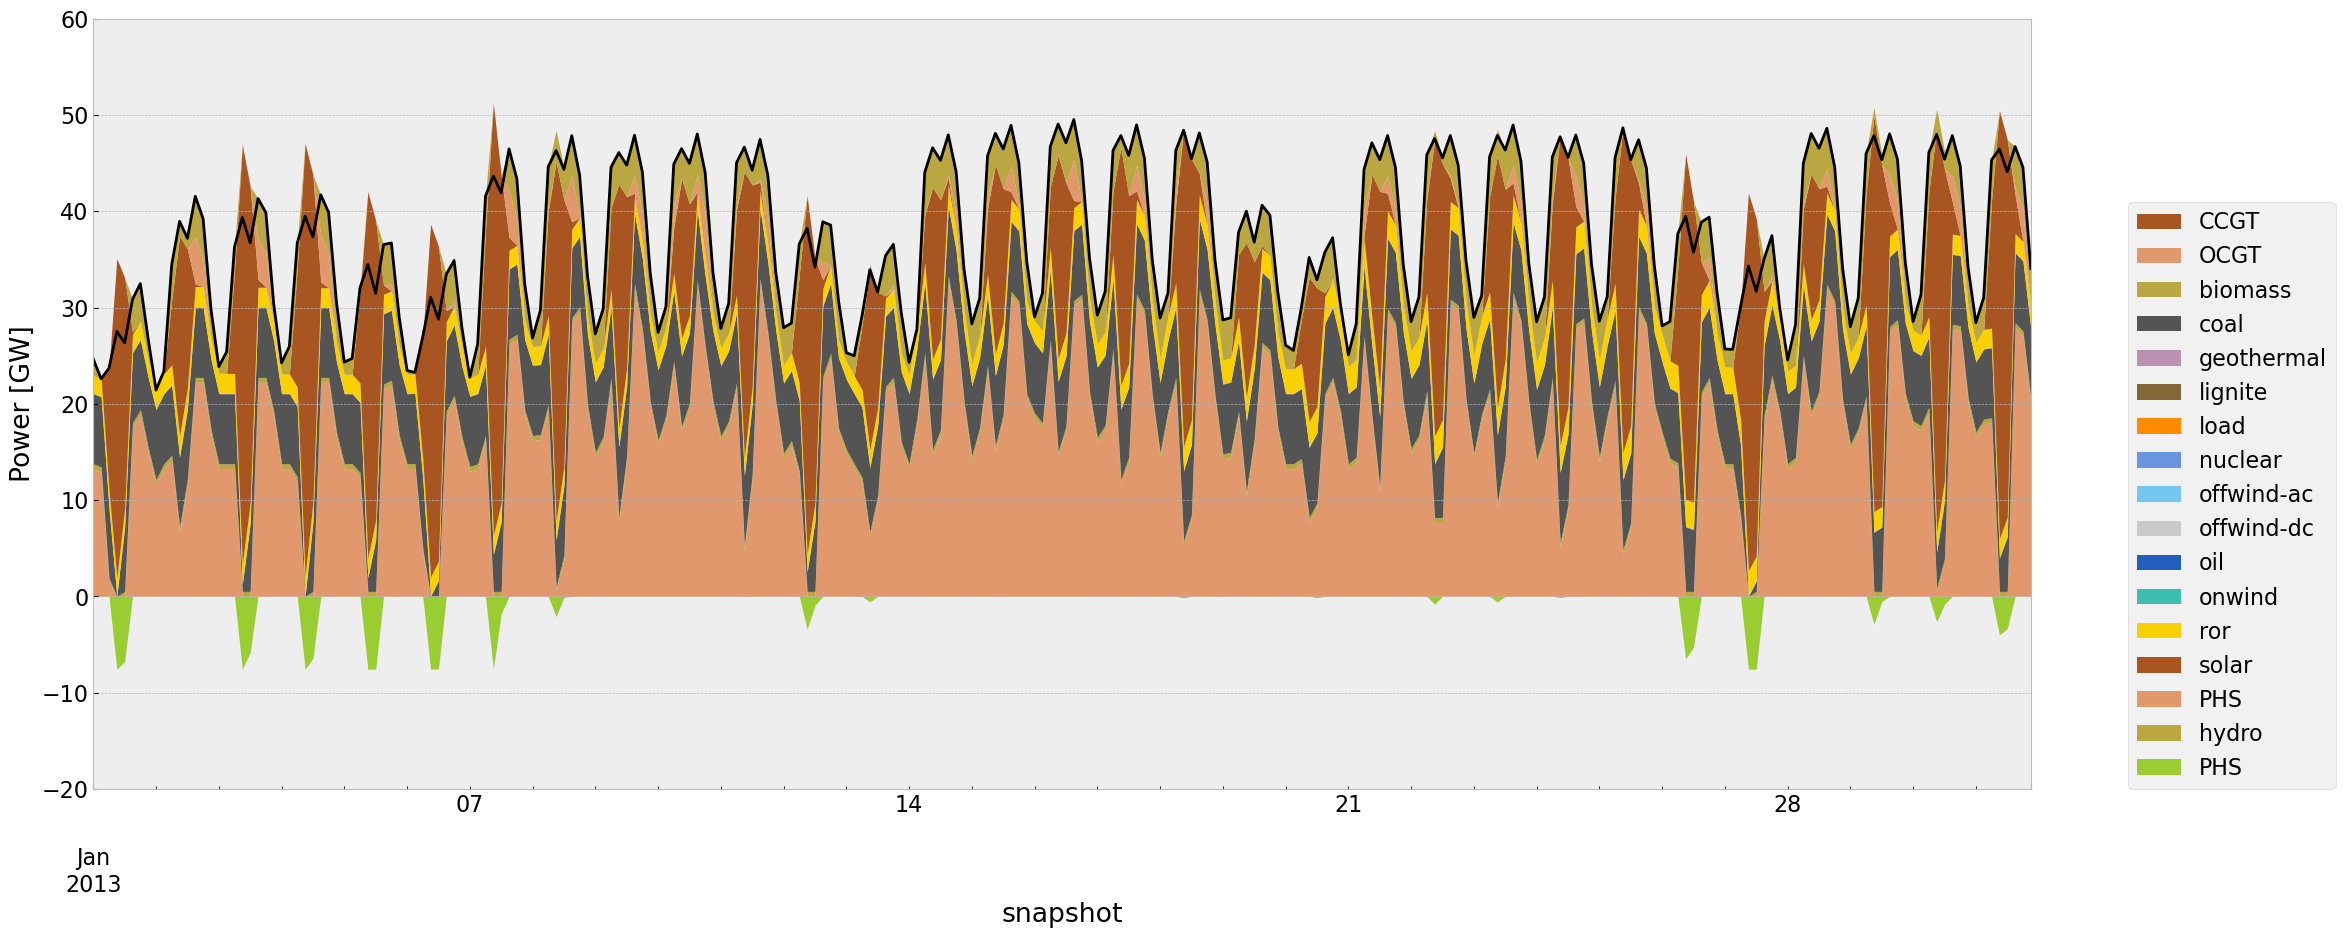

In [129]:
gen_curve_month_winter(colors)

## Storage

In [134]:
def inst_store_table():
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,20]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier,PHS,hydro
bus,,
IT0 0,NaN,0.5030
IT0 1,2.4219,2.1556
IT0 2,0.2810,0.2280
IT0 3,1.8160,0.0790
IT0 4,2.2330,1.1272
IT0 5,0.5800,0.0240
IT1 0,0.2400,0.0780


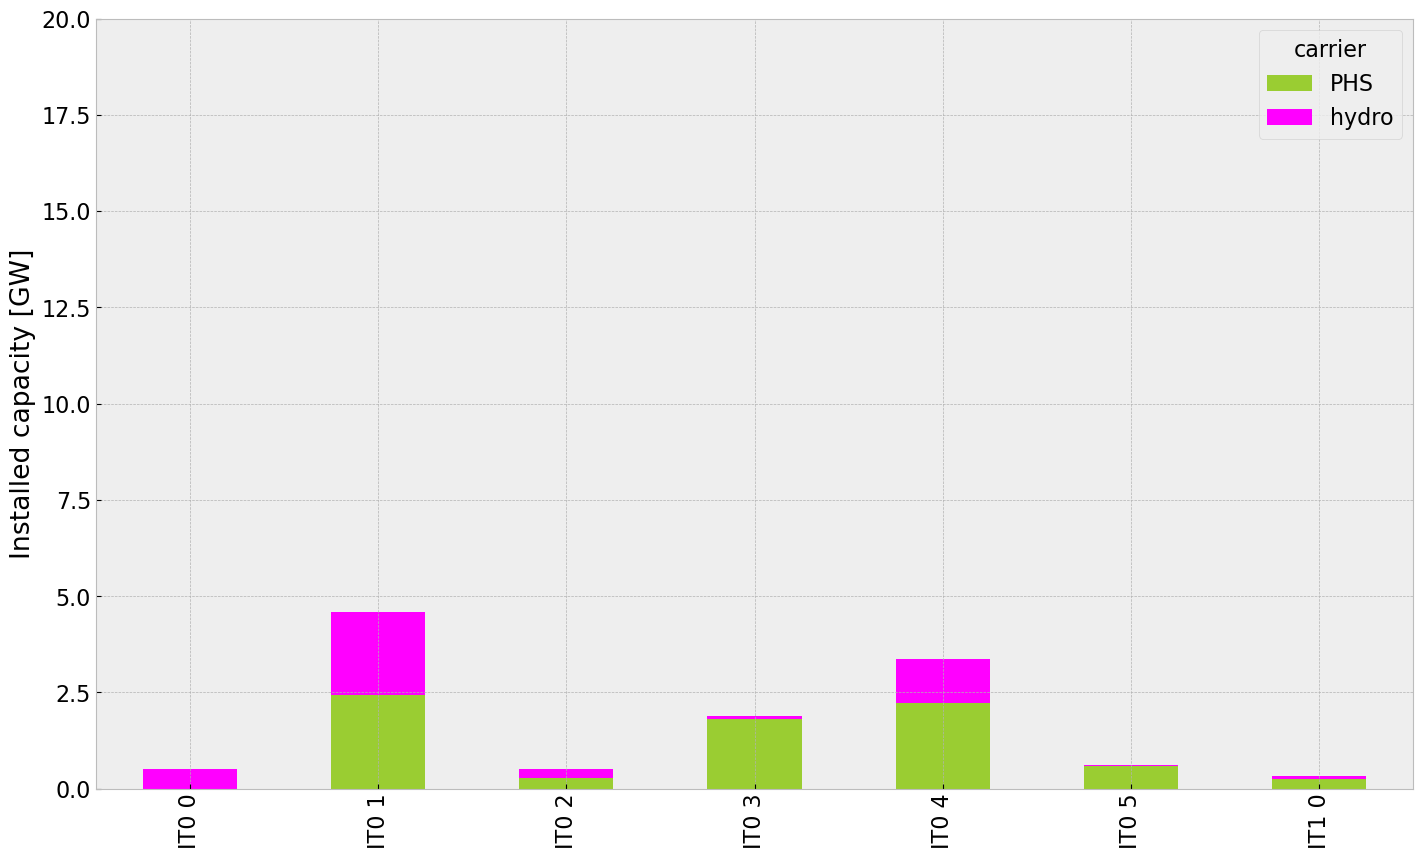

In [135]:
inst_store_table()

In [138]:
def state_of_charge_plot():
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14116\3958092944.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)


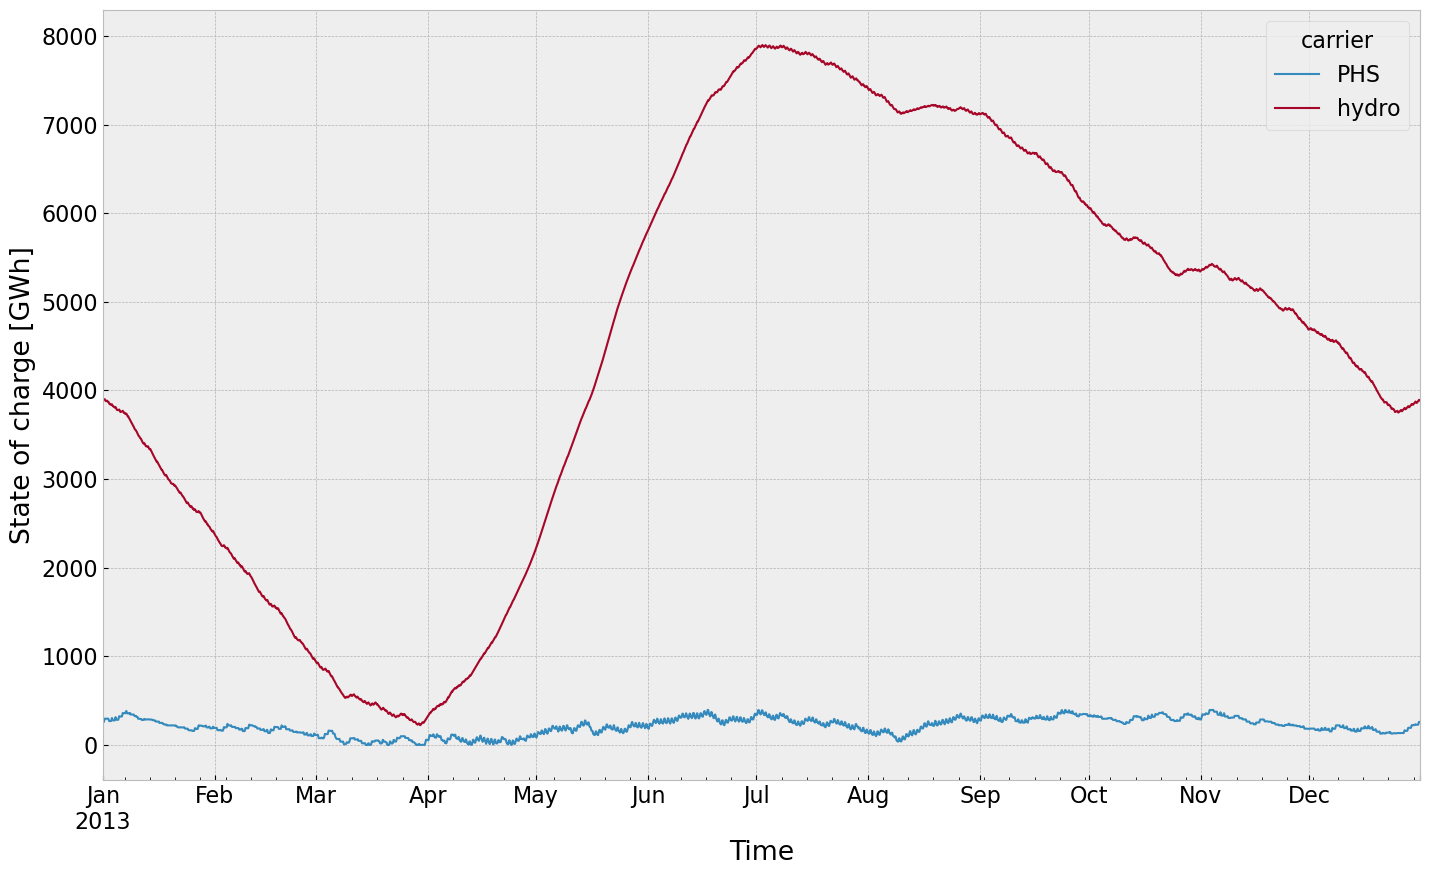

In [139]:
state_of_charge_plot()

## Price

In [152]:
def price_dur_curve_plot():
    
    price_dur_curve = pd.DataFrame()
    for region in n.buses_t.marginal_price.columns.tolist():
        price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    price_dur_curve.plot(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Time steps",
                    #title=f"Duration curves of the marginal price in the Italian regions in {year}",
                    linewidth=3,
)

plt.show()

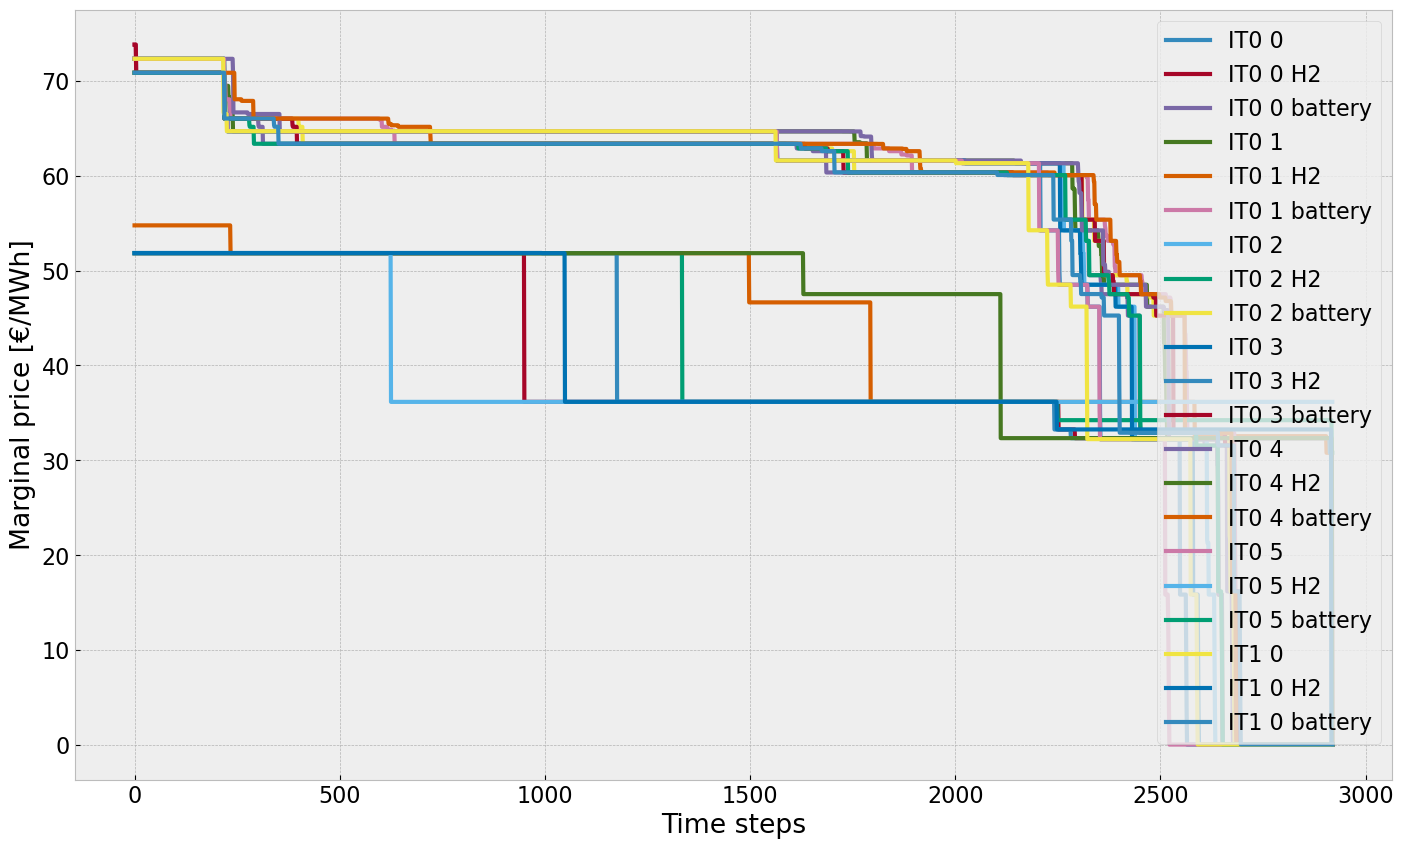

In [153]:
price_dur_curve_plot()

In [156]:
def price_regions_table():

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    n.buses_t.marginal_price.mean().plot.bar(ax=ax,
                                        grid=True,
                                        ylabel="Marginal price [€/MWh]",
                                        xlabel="Region",
                                        #title=f"Average marginal price in the Italian regions in {year}",
                                        linewidth=3,
    
    )

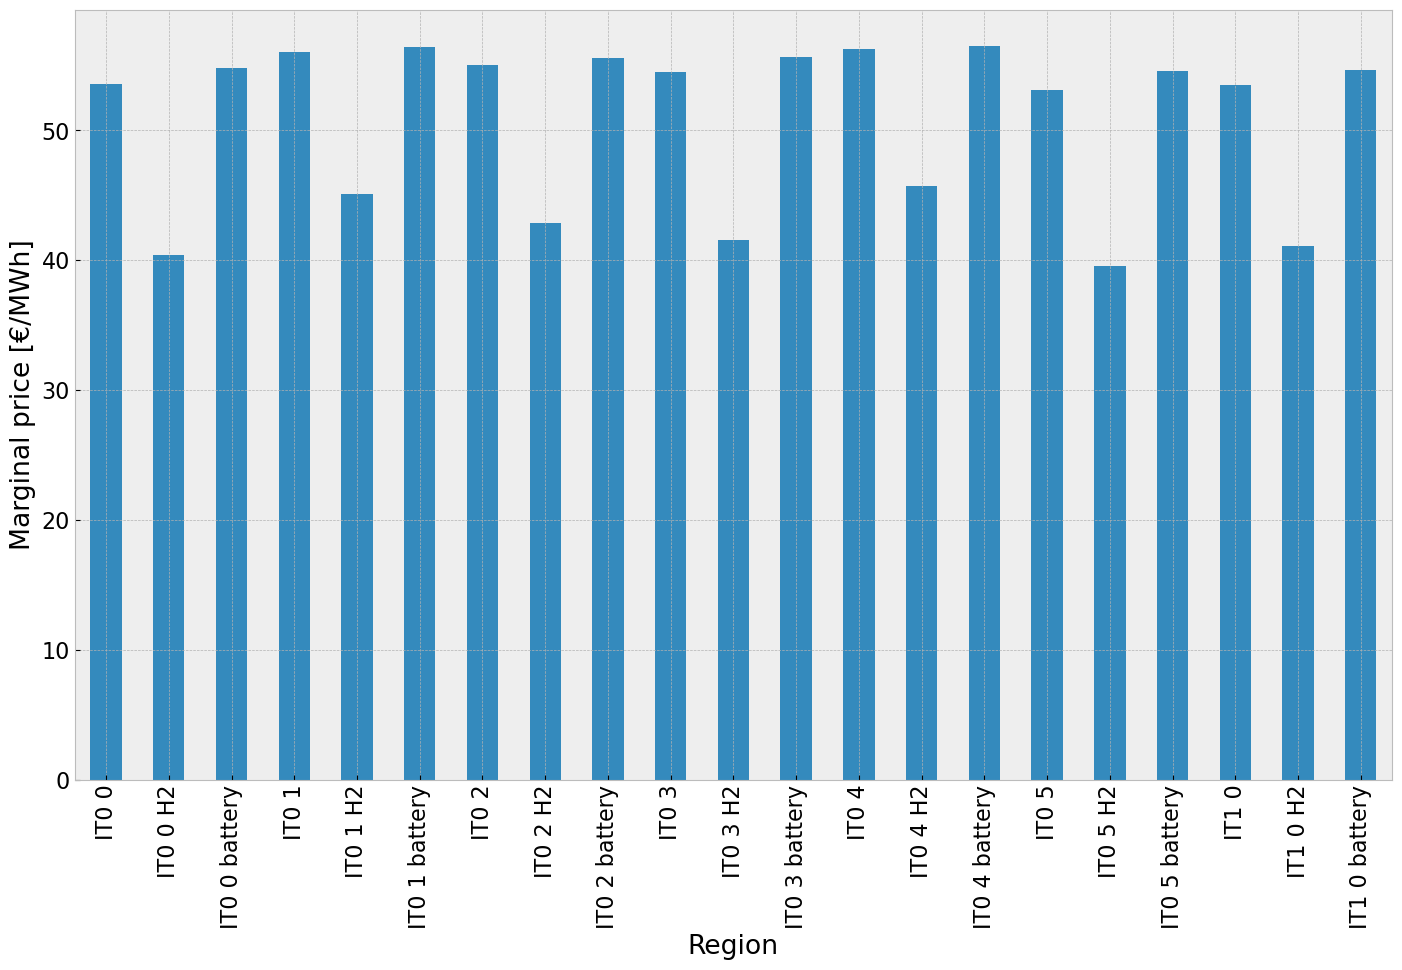

In [157]:
price_regions_table()

# Vulcan Erruption Scenario

# Germany 
## Installed Capacity

In [30]:
country_code = 'DE'
gen_DE = n.generators[n.generators.index.str.startswith(country_code)]
gen_DE.head()

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,marginal_cost_quadratic,lifetime,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
DE1 0 CCGT,CCGT,DE1 0,0.000000,0.000000,False,0.580000,46.812758,104788.020783,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 OCGT,OCGT,DE1 0,22888.536500,22888.536500,True,0.501555,55.115708,47718.670564,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 biomass,biomass,DE1 0,8004.647826,8004.647826,False,0.468000,15.838314,294201.051170,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 coal,coal,DE1 0,8158.220129,8158.220129,False,0.329804,32.243151,337208.027448,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
DE1 0 geothermal,geothermal,DE1 0,0.000000,0.000000,False,1.000000,0.010850,0.000000,inf,1.0,...,0.0,inf,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


<Figure size 640x480 with 0 Axes>

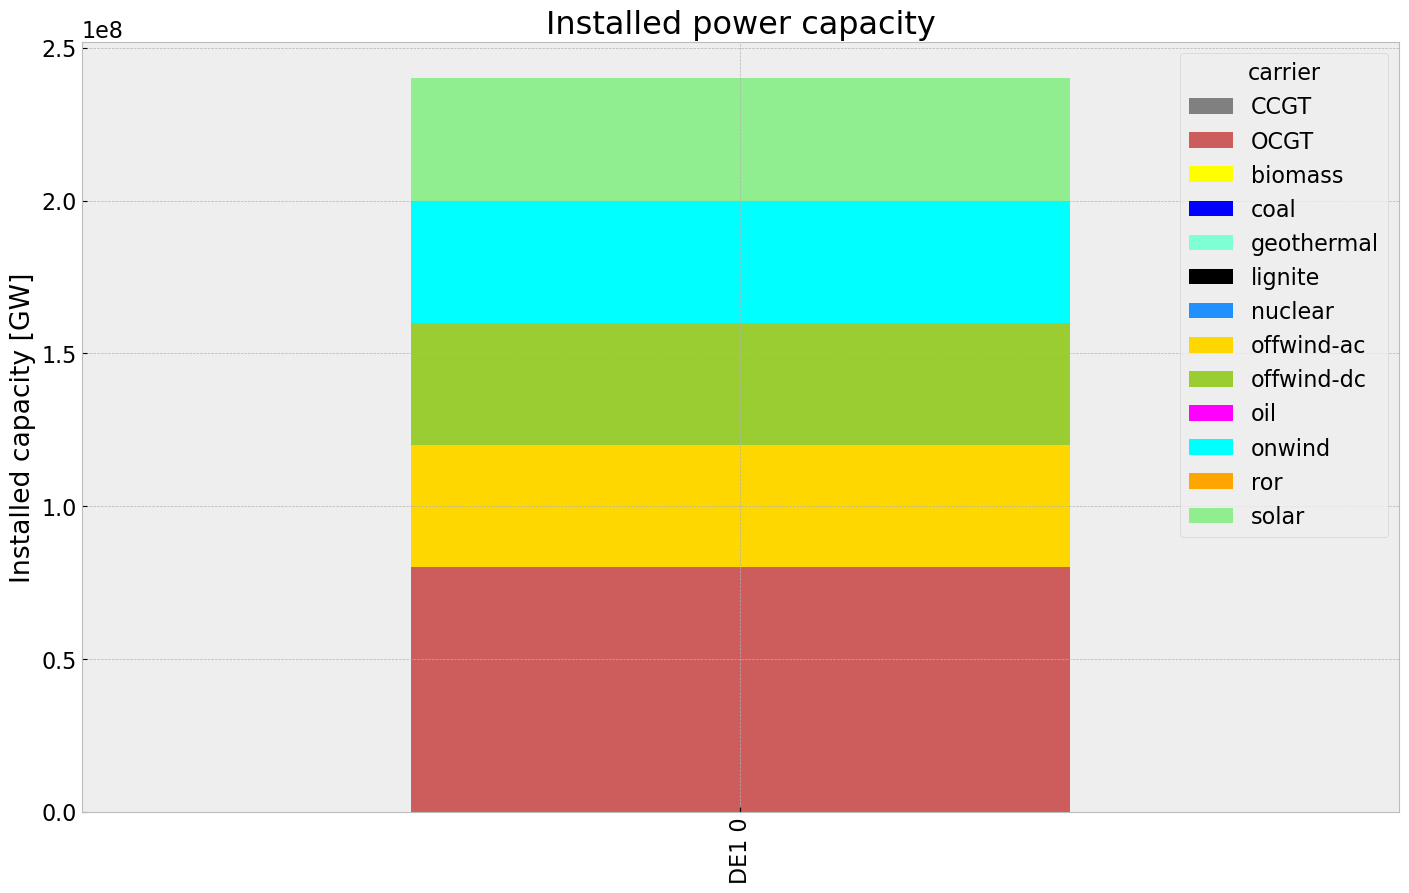

In [48]:
inst_cap_table(colors,gen_DE)

## Generations

<Figure size 640x480 with 0 Axes>

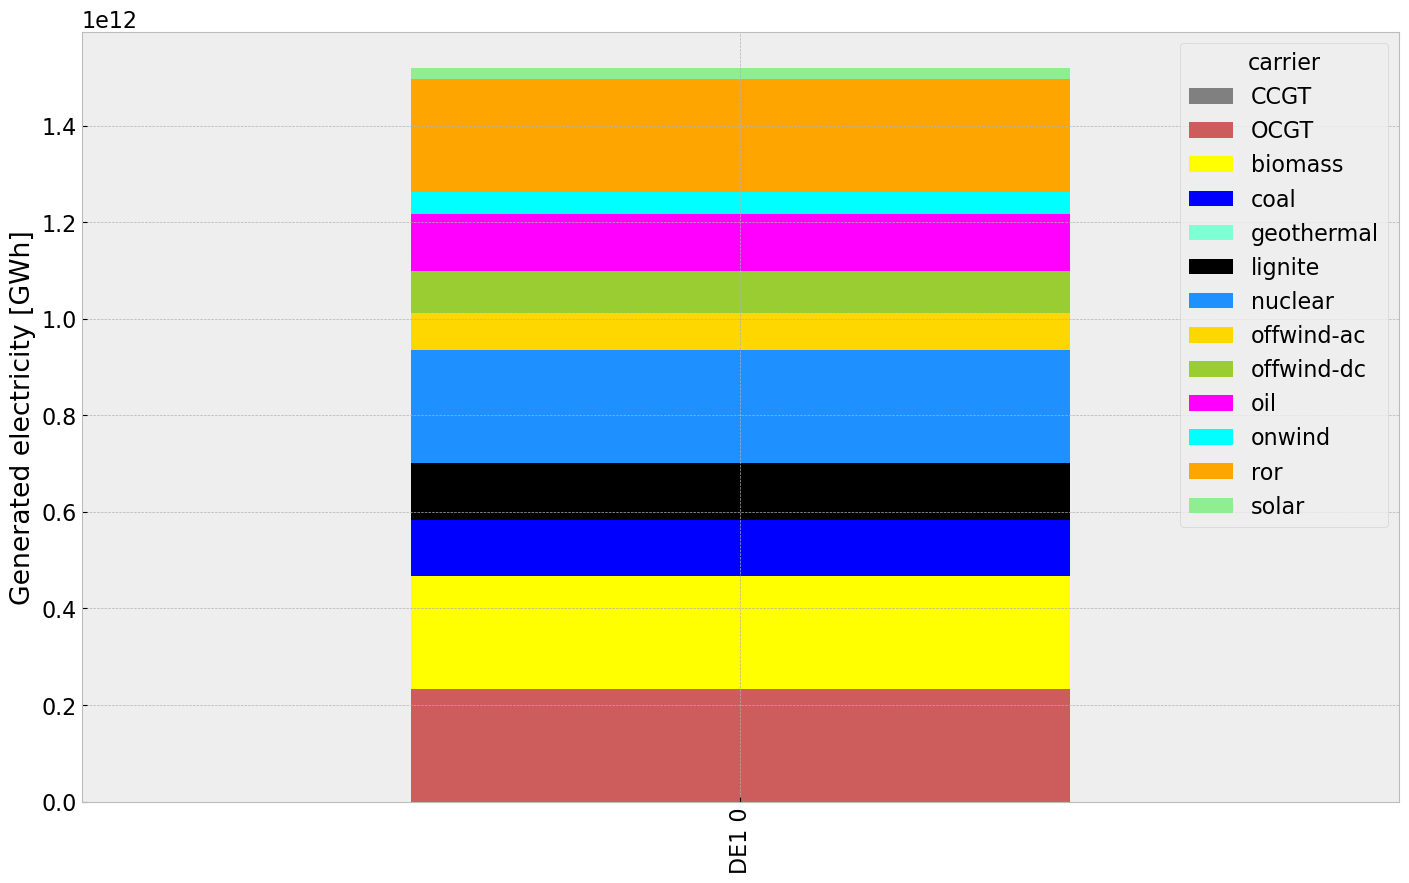

In [53]:
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                except KeyError:
                    print('error')

generations = generations.unstack().div(1000)
generations_DE = generations[generations.index.str.startswith(country_code)]#selected country's generation composition in GWh

plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations_DE.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                #title=f"Generated electricity in Italy in {year}"
    )

    plt.show()